<a href="https://colab.research.google.com/github/thevivekrathi/IRIS_species_classification/blob/main/IRIS_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Defining a glimpse method to get important insights about the dataset such as its shape, head, missing values if any, datatypes, some stats about the numerical features/columns and the value counts of categorical features. 

We can surely update this method as per our own convenience and requirement. 

In [ ]:
def glimpse(df):
  print('Shape of the dataset is: {}\n'.format(df.shape))
  print(f'Head of the dataset: \n{df.head()}\n')
  print(f'Missing Values in the dataset: \n{df.isnull().sum()}\n')
  print(f'Datatypes: \n{df.dtypes}\n')
  print(f'Describe: \n{df.describe()}\n')
  for column in df.columns:
    if df[column].dtypes == 'object':
      print(f'Categorical feature {column.upper()} has following values and counts: \n{df[column].value_counts()}')

There are multiple ways to load most of the publicly available datasets, in this scenario we are using seaborn to load the iris dataset. 

You can also do this using one of the following packages:
- pydataset
- seaborn
- sklearn
- statsmodel
- nltk

In [ ]:
data = sns.load_dataset('iris')

Now as we have loaded our dataset, lets pass it through the glimpse function we defined earlier. 

In [ ]:
glimpse(data)

Shape of the dataset is: (150, 5)

Head of the dataset: 
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Missing Values in the dataset: 
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Datatypes: 
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Describe: 
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     

Well, the output above gives us a good insight on the dataset, for example, 
- we have 150 rows and 5 columns
- we are dealing with 3 different species and the data is uniformly divided where each species has 50 rows
- we can also see that there is no missing information in the dataset 
- except the species column as object datatype all other features are in float64
- if you look closely to the statiscal information, we can see that the range of values is different for each feature

Now lets create some plots to see how the data looks and what patterns does it have to show us.


1. Univariate Plots

Plots showing distribution of each variable separately that gives us a better idea about how are the values distriuted for that particular variable/feature.

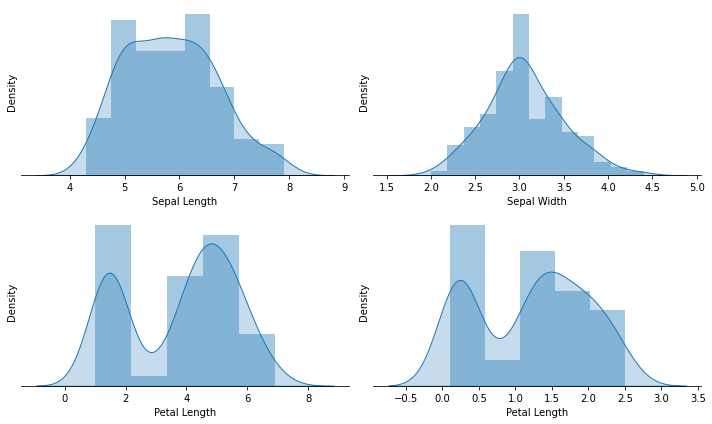

In [ ]:
f, axes = plt.subplots(2,2, figsize=(10,6))
sns.despine(left=True)

sns.distplot(x=data.sepal_length, kde_kws={"shade": True}, ax=axes[0,0], axlabel='Sepal Length')
sns.distplot(x=data.sepal_width, kde_kws={"shade": True}, ax=axes[0,1], axlabel='Sepal Width')
sns.distplot(x=data.petal_length, kde_kws={"shade": True}, ax=axes[1,0], axlabel='Petal Length')
sns.distplot(x=data.petal_width, kde_kws={"shade": True}, ax=axes[1,1], axlabel='Petal Length')

plt.setp(axes, yticks=[])
plt.tight_layout()

2. Bivariate Plots

Plots that compares two variable which can be very effective to see the correlation between them if any. This can be done through different types of plots. 

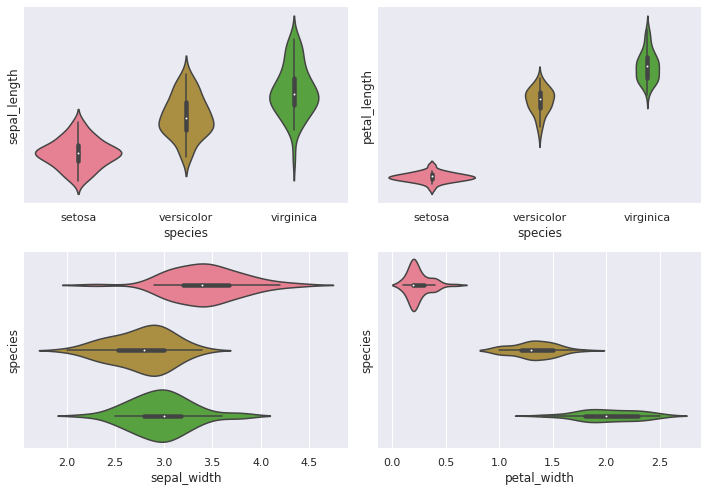

In [ ]:
f, axes = plt.subplots(2,2, figsize=(10,7))
sns.despine(left=True)
sns.set(palette="husl")

sns.violinplot(x=data.species, y=data.sepal_length, ax=axes[0,0])
sns.violinplot(y=data.species, x=data.sepal_width, ax=axes[1,0])

sns.violinplot(x=data.species, y=data.petal_length, ax=axes[0,1])
sns.violinplot(y=data.species, x=data.petal_width, axx=axes[1,1])

plt.setp(axes, yticks=[])
plt.tight_layout()

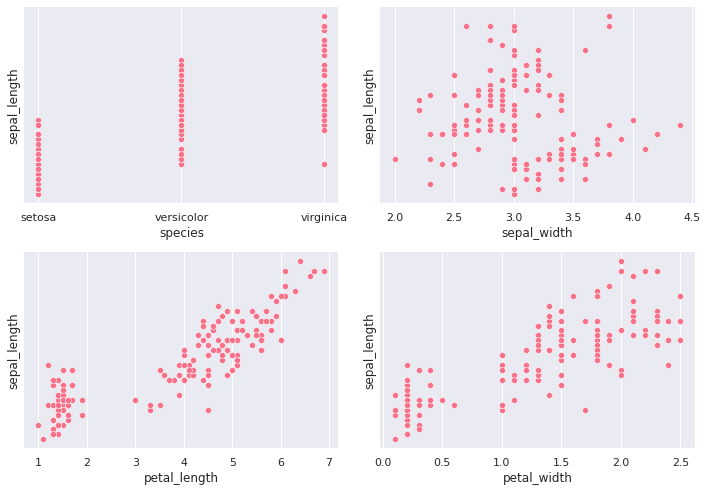

In [ ]:
f, axes = plt.subplots(2,2, figsize=(10,7))
sns.despine(left=True)
sns.set(palette="husl")

sns.scatterplot(x=data.species, y=data.sepal_length, ax=axes[0,0])
sns.scatterplot(y=data.sepal_length, x=data.sepal_width, ax=axes[0,1])
sns.scatterplot(y=data.sepal_length, x=data.petal_length, ax=axes[1,0])
sns.scatterplot(y=data.sepal_length, x=data.petal_width, ax=axes[1,1])

plt.setp(axes, yticks=[])
plt.tight_layout()

3. Multivariate plot

Plot where we can compare multiple variables at once to see how each of them correlates to all the others.

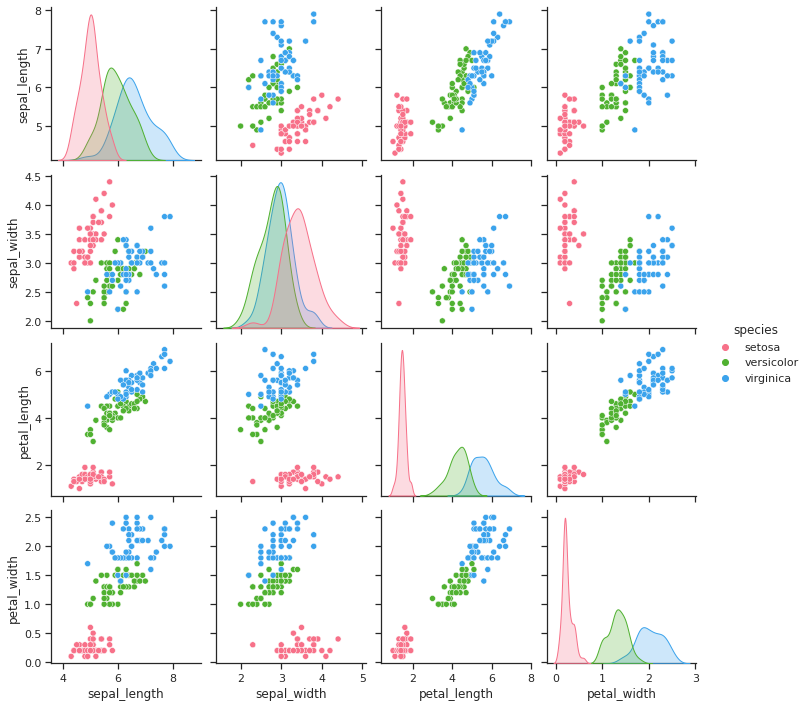

In [ ]:
sns.pairplot(data=data, hue="species", palette="husl")

In [ ]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


It is time to train our model that can help us predict the right species given the inputs. 

First we will define our input variables (X) and the variable to predict (y).

In [ ]:
X = data.drop('species', axis=1)
y = data.species

Now, it is time to split the dataset into train & test and also define our test size.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

From here we are using KFold cross validation with different models to find out which model would give the best accuracy with our dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
def test_models(X_train, X_test, y_train, y_test):
    '''
    Lightweight script to test many models and find winners
    '''
    #from sklearn.model_selection import train_test_split
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    dfs = []
    models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()), 
          ('GNB', GaussianNB()),
          ('XGB', XGBClassifier())
        ]
    
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
    target_names = ['virginica', 'versicolor', 'setosa']
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
    
    results.append(cv_results)
    names.append(name)
    
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    
    final = pd.concat(dfs, ignore_index=True)
    return final

In [ ]:
test_models(X_train, X_test, y_train, y_test)

LogReg
              precision    recall  f1-score   support

   virginica       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        11
      setosa       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

RF
              precision    recall  f1-score   support

   virginica       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        11
      setosa       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

KNN
              precision    recall  f1-score   support

   virginica       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        11
      setosa       1.00      1.00      1.00        10

    ac

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,model
0,0.025461,0.003875,1.000000,1.000000,1.000000,1.000000,XGB
1,0.021345,0.003662,0.833333,0.833333,0.833333,0.833333,XGB
2,0.021362,0.003745,0.916667,0.933333,0.916667,0.912963,XGB
3,0.022384,0.003961,0.916667,0.933333,0.916667,0.912963,XGB
4,0.023385,0.003799,1.000000,1.000000,1.000000,1.000000,XGB
5,0.021634,0.003689,1.000000,1.000000,1.000000,1.000000,XGB
6,0.021589,0.003916,1.000000,1.000000,1.000000,1.000000,XGB
7,0.025259,0.003807,0.916667,0.933333,0.916667,0.917508,XGB
8,0.021910,0.004525,0.833333,0.944444,0.833333,0.847222,XGB
9,0.022585,0.003932,0.916667,0.927083,0.916667,0.911111,XGB


There are a few models that works well with the dataset, but we have to choose one to continue, so, we are going with Logistic Regression as our true model.

In [ ]:
true_model = LogisticRegression()
true_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = true_model.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

1.0


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[ 9  0  0]
 [ 0 11  0]
 [ 0  0 10]]


The true_model is 100% accurate when it comes to predicting the species. So, let's save this model using pickle. 

In [ ]:
import pickle

In [ ]:
model1 = pickle.dumps(true_model)

Let's try how our trained model performs with random values.

To do so, we will load the model saved using pickle, and then will use the predict function to find out the species based on the given values.

In [ ]:
model2 = pickle.loads(model1)

In [ ]:
a = np.array([2.1,3.5,2.4,3.2])

In [ ]:
model2.predict(a.reshape(1,-1))

array(['setosa'], dtype=object)